In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint
import os
import csv

In [4]:
#Import data from API's and merge
import urllib.parse

# Philly Arrests API URL
crime_url = "https://phl.carto.com/api/v2/sql?q=SELECT * FROM arrests_zipcode"

try:
    crime_data = requests.get(crime_url)
    
    crime_df = pd.DataFrame(crime_data.json()['rows'])
    
except Exception as e:
    print(e)

In [13]:
#print crime df for reference
crime_df

,cartodb_id,the_geom,the_geom_webmercator,offense_category,day,zip_code,defendant_race,count,objectid
0,1,None,None,Aggravated Assault,2011-02-20T05:00:00Z,19151,Black,1,26605042
1,2,None,None,Aggravated Assault,2011-02-21T05:00:00Z,19119,Black,1,26605043
2,3,None,None,Aggravated Assault,2011-02-21T05:00:00Z,19134,Latinx,1,26605044
3,4,None,None,Aggravated Assault,2011-02-21T05:00:00Z,19139,Black,1,26605045
4,5,None,None,Aggravated Assault,2011-02-21T05:00:00Z,19142,Black,1,26605046
...,...,...,...,...,...,...,...,...,...
377375,377376,None,None,Violation of Protection Order,2017-07-13T04:00:00Z,19119,Black,1,26979156
377376,377377,None,None,Violation of Protection Order,2017-07-13T04:00:00Z,19120,Latinx,1,26979157
377377,377378,None,None,Violation of Protection Order,2017-07-14T04:00:00Z,19120,Black,1,26979158
377378,377379,None,None,Violation of Protection Order,2017-07-14T04:00:00Z,19130,White,1,26979159


In [26]:
#Filter crime df to 2023 and zip code
philly_crime_23 = crime_df.loc[(crime_df['day'].str.startswith('2023'))&(crime_df['zip_code'] != 'Unknown'),'zip_code']

#Filter crime df to 2017 and zip code
philly_crime_17 = crime_df.loc[(crime_df['day'].str.startswith('2017'))&(crime_df['zip_code'] != 'Unknown'),'zip_code']

In [17]:
philly_crime_counts = pd.DataFrame(philly_crime_23.value_counts())
philly_crime_counts = philly_crime_counts.rename(columns={'zip_code':'offense_count'})
philly_crime_counts

,count
zip_code,
19134,1274
19140,655
19124,578
19132,490
19133,471
19143,445
19139,440
19120,336
19121,329


In [27]:
philly_crime_counts_2017 = pd.DataFrame(philly_crime_17.value_counts())
philly_crime_counts_2017 = philly_crime_counts_2017.rename(columns={'zip_code':'offense_count'})
philly_crime_counts_2017

,count
zip_code,
19134,3407
19140,1749
19124,1734
19133,1590
19132,1242
19139,1214
19143,1101
19148,951
19120,948


In [12]:
#Import Zillow CSV

csvpath = os.path.join('zillowzipcodedata.csv')
with open(csvpath) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    zillowdf = pd.DataFrame(csvreader)

zillowdf

,0,1,2,3,4,5,6,7,8,9,...,282,283,284,285,286,287,288,289,290,291
0,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
1,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222052.68017348624,...,484345.0461544719,482936.9399577234,480955.19256396574,478744.25176576973,477613.8846602957,478401.56745701423,480558.51876555564,482993.0862528761,485617.0767970653,487831.1354102075
2,61148,2,08701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,130236.99313613036,...,524721.1968862342,528538.2597940094,531632.9713195749,534333.6247623359,536596.4593817269,540647.0925736866,545952.4675578579,551647.2614460504,556597.0337093255,560839.453834778
3,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,112454.71073291406,...,282570.1171092408,281580.12779212376,280012.8957747572,278208.10881953436,276661.0766577643,275862.49345790857,275515.35748518,275702.6677503533,276434.31899948587,277595.23085735884
4,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,98216.0116608507,...,433592.261724363,432717.24716096587,431011.05487445387,430956.63267760625,431741.11460843845,434614.26581865264,436457.63268578885,440306.545141323,446840.284061904,456389.75140508875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26997,78282,39992,46799,zip,IN,IN,Zanesville,"Bluffton, IN",Wells County,,...,174123.6623323902,174172.88398659648,174181.4513126473,174200.65957450913,174598.14825643768,175628.74363728586,177150.48592426337,178769.55122835663,180472.82447419091,181671.66354939598
26998,80861,39992,52163,zip,IA,IA,Protivin,,Howard County,,...,109678.63762813694,110134.99173179579,110443.67558845435,110279.0631042656,109588.41333095654,108881.41388536633,108710.33360038356,109310.6225411219,109935.14796093992,110191.92853414723
26999,69074,39992,26576,zip,WV,WV,Farmington,"Fairmont, WV",Marion County,,...,95911.44759043424,95562.33142622894,95631.76768398796,95975.16960295539,96704.6963793453,97441.94194431107,98106.50531266793,99123.29835463555,99862.54909242934,100795.87518481664
27000,64515,39992,16245,zip,PA,PA,Oak Ridge,"Pittsburgh, PA",Armstrong County,,...,79133.93826720655,77945.09728969418,77346.76828300922,77590.70535434676,77460.74651504967,76524.04011262943,75380.91813211096,75422.75093154731,76142.31267406757,76835.24788869607


In [11]:
fullphillyzillow = zillowdf.loc[(zillowdf[6] == 'Philadelphia')&(zillowdf[5] == 'PA'),2:]
fullphillyzillow = fullphillyzillow.rename(columns={2:'zip_code'})
fullphillyzillow = fullphillyzillow.set_index('zip_code')
fullphillyzillow = fullphillyzillow.loc[:,np.arange(153,226,12)]

# this is the final timepoint
phillyzillow = zillowdf.loc[(zillowdf[6] == 'Philadelphia')&(zillowdf[5] == 'PA'),(2,290)]
phillyzillow = phillyzillow.rename(columns={2:'zip_code',290:'ZHVI'})
phillyzillow = phillyzillow.set_index('zip_code')

phillyzillow

,ZHVI
zip_code,
19120,154863.38974438733
19124,154550.76210978496
19111,276153.0282277435
19143,128319.86561249373
19149,219442.2041384154
19134,101171.02466936766
19140,80651.42375367768
19148,250042.700923404
19104,213161.1826626692


In [31]:
# this is the final timepoint
phillyzillow_17 = zillowdf.loc[(zillowdf[6] == 'Philadelphia')&(zillowdf[5] == 'PA'),(2,218)]
phillyzillow_17= phillyzillow_17.rename(columns={2:'zip_code',218:'ZHVI'})
phillyzillow_17= phillyzillow_17.set_index('zip_code')

phillyzillow_17

,ZHVI
zip_code,
19120,91161.75245238922
19124,87898.38327786887
19111,170362.91072537983
19143,62035.09664741728
19149,138139.39311334817
19134,55439.89713119005
19140,30963.872923625662
19148,186427.92863405147
19104,126977.17232627819


In [22]:
#Merged and Cleaned Philly data

philly_combined_current = pd.merge(philly_crime_counts,phillyzillow,how='left', right_on = 'zip_code',left_index=True)
philly_combined_current = philly_combined.dropna()
philly_combined_current

,zip_code,count,ZHVI
19134,19134,1274,101171.02466936766
19140,19140,655,80651.42375367768
19124,19124,578,154550.76210978496
19132,19132,490,69297.52861962702
19133,19133,471,67874.74665432339
19143,19143,445,128319.86561249373
19139,19139,440,114687.2680953382
19120,19120,336,154863.38974438733
19121,19121,329,188191.00190165758
19104,19104,306,213161.1826626692


In [32]:
philly_combined_past = pd.merge(philly_crime_counts_2017,phillyzillow_17,how='left', right_on = 'zip_code',left_index=True)
philly_combined_past = philly_combined_past.dropna()
philly_combined_past

,zip_code,count,ZHVI
19134,19134,3407,55439.89713119005
19140,19140,1749,30963.872923625662
19124,19124,1734,87898.38327786887
19133,19133,1590,25357.30515850967
19132,19132,1242,20412.67431643527
19139,19139,1214,51653.31429343222
19143,19143,1101,62035.09664741728
19148,19148,951,186427.92863405147
19120,19120,948,91161.75245238922
19121,19121,917,76156.35268880537


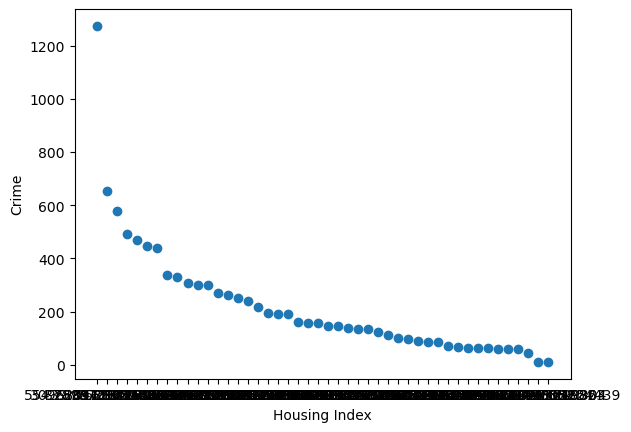

In [33]:
#Scatter plot displaying Crime vs. Price Earlier Year

#Setting to lists
housing_earlier = list(philly_combined_past['ZHVI'])
crime_earlier = list(philly_combined_past['count'])

#Regression
# d_slope, d_int, d_r, d_p, d_std_err = st.linregress(housing_earlier, crime_earlier)
# housing_earlier_array = np.asarray(housing_earlier)
# d_fit = np.multiply(housing_earlier_array, d_slope) + d_int

#Plot 2017 data
plt.scatter(housing_earlier,crime_later)
# plt.plot(ZHVI, d_fit,"--")
plt.xlabel('Housing Index')
plt.ylabel('Crime')
plt.show()

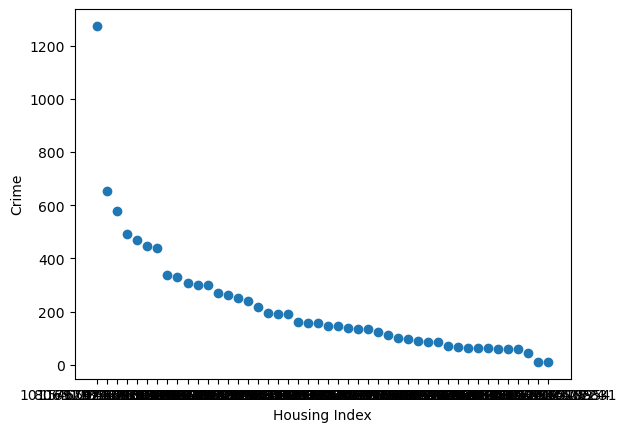

In [34]:
#Scatter plot displaying Crime vs. Price Later Year

#Setting to lists
housing_later = list(philly_combined_current['ZHVI'])
crime_later = list(philly_combined_current['count'])

#Regression
# d_slope, d_int, d_r, d_p, d_std_err = st.linregress(housing_later, crime_later)
# housing_later_array = np.asarray(housing_later)
# d_fit = np.multiply(housing_later_array, d_slope) + d_int

#Plot 2023 data
plt.scatter(housing_later,crime_later)
# plt.plot(housing_later, d_fit,"--")
plt.xlabel('Housing Index')
plt.ylabel('Crime')
plt.show()